<a href="https://colab.research.google.com/github/wallas999/Mis_Proyectos/blob/main/ERNC_y_FE_Chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Version 0.1 Se trabaja con categorías de Sectores energéticos desagregados

import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definición del problema

XX
XX enumerar para abajo

# 2. Cargar la información

*   Leer el archivo CSV original
*   Importar librerías necesarias




In [19]:
# Se identifica la codificación del archivo en el Terminal
#file bne_balance_nacional\(in\).csv
# Terminal indica: Unicode text, UTF-8 (with BOM) text, with CRLF line terminators

# Leer con la codificación "oficial"
df_csv = pd.read_csv("bne_balance_nacional(in).csv", sep=";", encoding="utf-8-sig")

# Al parecer, el archivo fue guardado con una codificación distinta a la real.
# Se reparan las cadenas mal decodificadas
df_csv = df_csv.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

display(df_csv)




/tmp/ipython-input-3830231980.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_csv = df_csv.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)


,anio,item,categoria,seccion,combustible,tcal
0,2008,OFERTA,Producción Primaria,Energéticos Primarios,Petróleo Crudo,"1397,41619"
1,2008,OFERTA,Importación,Energéticos Primarios,Petróleo Crudo,"108806,2132"
2,2008,OFERTA,Producción Primaria,Energéticos Primarios,Gas Natural,"18854,75245"
3,2008,OFERTA,Importación,Energéticos Primarios,Gas Natural,"7287,378755"
4,2008,OFERTA,Producción Primaria,Energéticos Primarios,Carbón,"2764,914675"
...,...,...,...,...,...,...
18267,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Gas Coque,0
18268,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Alquitrán,0
18269,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Gas de Altos Hornos,0
18270,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Gas Corriente,Gas Corriente,0


# Exploración inicial

In [20]:
display(df_csv["item"].unique())



array(['OFERTA', 'C.TRANSFO.', 'CONSUMO FINAL'], dtype=object)

Dado que el análisis se centrará en el CONSUMO FINAL, exploraré el resto de las columnas para este item en particular.

In [21]:
display(df_csv[df_csv["item"] == "CONSUMO FINAL"]["categoria"].unique())



array(['Sector Energético: Auto Consumo', 'Sector Industrial y Minero',
       'Cobre', 'Salitre', 'Hierro', 'Papel y Celulosa', 'Siderurgia',
       'Petroquímica', 'Cemento', 'Azúcar', 'Pesca', 'Industrias Varias',
       'Minas Varias', 'Sector Transporte', 'Caminero', 'Ferroviario',
       'Marítimo', 'Aéreo', 'Sector Comercial, Público y Residencial',
       'Comercial', 'Público', 'Residencial',
       'Cons. No Energético - Industrial', 'Carbón y Leña',
       'Electricidad', 'Siderurgia Hornos de Coque',
       'Siderurgia Altos Hornos', 'Plantas de Gas',
       'Refinería Petróleo - Gas Natural', 'Producción de Metanol',
       'Terrestre', 'Agroindustria', 'Construcción',
       'Transporte por Ducto', 'Sanitarias', 'Industria Láctea'],
      dtype=object)

Se observa una desagregación de los distintos "Sectores" y sus elementos particulares. Por ejemplo, se tiene el "Sector Transporte" y, de manera desagregada: 'Caminero', 'Ferroviario', 'Marítimo', 'Aéreo'. Dado nuestro objetivo planteado al principio, solo analizaremos los sectores de manera agregada. Los Sectores son aquellos que comienzan con la palabra Sector, los que se pasan a ideantificar a continuación.

In [22]:
display(
    df_csv[
        (df_csv["item"] == "CONSUMO FINAL")
        & (df_csv["categoria"].str.contains("Sector", case=False))
    ]["categoria"].unique().tolist()
)

['Sector Energético: Auto Consumo',
 'Sector Industrial y Minero',
 'Sector Transporte',
 'Sector Comercial, Público y Residencial']

Se identifican los 4 sectores principales:
* 'Sector Energético: Auto Consumo',
* 'Sector Industrial y Minero',
* 'Sector Transporte',
* 'Sector Comercial, Público y Residencial'



In [23]:
display(df_csv[df_csv["item"] == "CONSUMO FINAL"]["seccion"].unique())


array(['Energéticos Primarios', 'Derivados De Petróleo', 'Electricidad',
       'Derivados De Carbón', 'Gas Corriente', 'Metanol'], dtype=object)

De acá filtraré la sección electricidad, pues me centraré solo en esos consumos.

In [24]:
display(df_csv[df_csv["item"] == "CONSUMO FINAL"]["combustible"].unique())

array(['Petróleo Crudo', 'Gas Natural', 'Carbón', 'Biomasa',
       'Energía Hídrica', 'Energía Eólica', 'Petróleo Diesel',
       'Petróleo Combustible', 'Gasolina de motor', 'Kerosene',
       'Gas Licuado', 'Gasolina de Aviación', 'Kerosene de Aviación',
       'Nafta', 'Gas de Refinería', 'Coque de Petróleo',
       'D.I. de Petróleo', 'Electricidad', 'Coque Mineral', 'Gas Coque',
       'Alquitrán', 'Gas de Altos Hornos', 'Gas Corriente', 'Metanol',
       'Biogás', 'Energía Solar', 'Geotermia'], dtype=object)

Desde acá filtraré la magnitud del total de energía proveniente de ERNC (Energías Renovables No Convencionales).

# Limpieza de información

Ahora se revisará la información por medio de algunas comprobaciones básicas

In [25]:
#Comprobación de valores nulos
df_csv.isnull()
df_csv.isnull().sum()


,0
anio,0
item,0
categoria,0
seccion,0
combustible,0
tcal,0


Se confirma que no hay valores nulos.

Renombraremos algunas columnas de manera más formal.

In [26]:
df_csv = df_csv.rename(columns={
    "anio": "Año",
    "combustible": "Combustible",
    "tcal": "Energía"
})
display(df_csv)

,Año,item,categoria,seccion,Combustible,Energía
0,2008,OFERTA,Producción Primaria,Energéticos Primarios,Petróleo Crudo,"1397,41619"
1,2008,OFERTA,Importación,Energéticos Primarios,Petróleo Crudo,"108806,2132"
2,2008,OFERTA,Producción Primaria,Energéticos Primarios,Gas Natural,"18854,75245"
3,2008,OFERTA,Importación,Energéticos Primarios,Gas Natural,"7287,378755"
4,2008,OFERTA,Producción Primaria,Energéticos Primarios,Carbón,"2764,914675"
...,...,...,...,...,...,...
18267,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Gas Coque,0
18268,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Alquitrán,0
18269,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Derivados De Carbón,Gas de Altos Hornos,0
18270,2021,CONSUMO FINAL,Cons. No Energético - Industrial,Gas Corriente,Gas Corriente,0


# Data Wrangling


## Filtro el dataset para mantener solo la información que realmente utilizaré

In [27]:
display(df_csv["item"].unique())

array(['OFERTA', 'C.TRANSFO.', 'CONSUMO FINAL'], dtype=object)

In [28]:
# Filtro solo los registros de {CONSUMO FINAL, Electricidad}

df_short_1 = df_csv[
    (df_csv["item"] == "CONSUMO FINAL") &
    (df_csv["seccion"] == "Electricidad")
]

display (df_short_1)

,Año,item,categoria,seccion,Combustible,Energía
329,2008,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"2005,566432"
353,2008,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"31504,9537"
377,2008,CONSUMO FINAL,Cobre,Electricidad,Electricidad,"15348,88517"
401,2008,CONSUMO FINAL,Salitre,Electricidad,Electricidad,"347,8986128"
425,2008,CONSUMO FINAL,Hierro,Electricidad,Electricidad,"406,9845235"
...,...,...,...,...,...,...
18153,2021,CONSUMO FINAL,Comercial,Electricidad,Electricidad,"7916,395465"
18181,2021,CONSUMO FINAL,Público,Electricidad,Electricidad,"1962,716785"
18209,2021,CONSUMO FINAL,Sanitarias,Electricidad,Electricidad,"1064,512251"
18237,2021,CONSUMO FINAL,Residencial,Electricidad,Electricidad,"12865,4654"


In [29]:
# Filtro solo los registros de agregados en alguna de las 4 categorías ya identificadas {CONSUMO FINAL, Electricidad}

df_short_2 = df_short_1[
    (df_short_1["categoria"].str.contains("Sector", case=False))
]

    # df_csv[
    #     (df_csv["item"] == "CONSUMO FINAL")
    #     & (df_csv["categoria"].str.contains("Sector", case=False))
    # ]["categoria"].unique().tolist()


display (df_short_2)

,Año,item,categoria,seccion,Combustible,Energía
329,2008,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"2005,566432"
353,2008,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"31504,9537"
641,2008,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,"366,6632798"
761,2008,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,"14091,42507"
1221,2009,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"1868,905698"
1247,2009,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"31469,17385"
1559,2009,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,"363,2060386"
1689,2009,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,"14499,8288"
2339,2010,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"1867,435807"
2547,2010,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"30928,09308"


Verifico que están solo las "categorias" de mi interés:

In [30]:
display(df_short_2["categoria"].unique())

array(['Sector Energético: Auto Consumo', 'Sector Industrial y Minero',
       'Sector Transporte', 'Sector Comercial, Público y Residencial'],
      dtype=object)

Reduzco el dataset solo a los años que son de mi interés.
Dado que en 2014 se cambió la metodología de asignación de consumos a cada categoría, comenzaré el análisis desde ese año para mantener consistencia en los resultados.

In [31]:
# Filtro solo los registros de años >= 2014

df_short_3 = df_short_2[
    (df_short_2["Año"] >= 2014)
]

display (df_short_3)

,Año,item,categoria,seccion,Combustible,Energía
7539,2014,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"3192,088454"
7747,2014,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"36116,10834"
8059,2014,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,"812,1559342"
8189,2014,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,"19699,23381"
8839,2015,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"3295,675349"
9047,2015,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"35983,88259"
9359,2015,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,"936,1764557"
9489,2015,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,"20251,80955"
10139,2016,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,"2970,568395"
10347,2016,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,"37270,30972"


##Verifico el tipo de dato para los valores que deben ser numéricos

In [39]:
print(df_short_3["Año"].dtype)
print(df_short_3["Energía"].dtype)
pd.to_numeric(df_short_3["Energía"], errors="coerce").notna().all()

int64
object


np.False_

In [33]:
# Los valores de "Energía" no son números, pues utilizan la coma como decimal.
# Se convierte a número

In [40]:
col_tcal = df_short_3['Energía']

# 1. Eliminar espacios al inicio y fin
col_tcal = col_tcal.str.strip()

# 2. Reemplazar coma decimal por punto, si aplica
col_tcal = col_tcal.str.replace(',', '.', regex=False)

# 3. Convertir a float
df_final = df_short_3.copy()
df_final['Energía'] = pd.to_numeric(col_tcal, errors='coerce')


display (df_final)

,Año,item,categoria,seccion,Combustible,Energía
7539,2014,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,3192.088454
7747,2014,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,36116.108340
8059,2014,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,812.155934
8189,2014,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,19699.233810
8839,2015,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,3295.675349
9047,2015,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,35983.882590
9359,2015,CONSUMO FINAL,Sector Transporte,Electricidad,Electricidad,936.176456
9489,2015,CONSUMO FINAL,"Sector Comercial, Público y Residencial",Electricidad,Electricidad,20251.809550
10139,2016,CONSUMO FINAL,Sector Energético: Auto Consumo,Electricidad,Electricidad,2970.568395
10347,2016,CONSUMO FINAL,Sector Industrial y Minero,Electricidad,Electricidad,37270.309720


Ahora todos los datos numéricos son efectivamente númericos.

#Se buscan Outliers

In [41]:
# En el caso de los años, solo se busca Mínimo y Máximo

print("Mínimo:", df_final['Año'].min())
print("Máximo:", df_final['Año'].max())


Mínimo: 2014
Máximo: 2021


Confirmo que son los años que quiero incluir en el análisis.

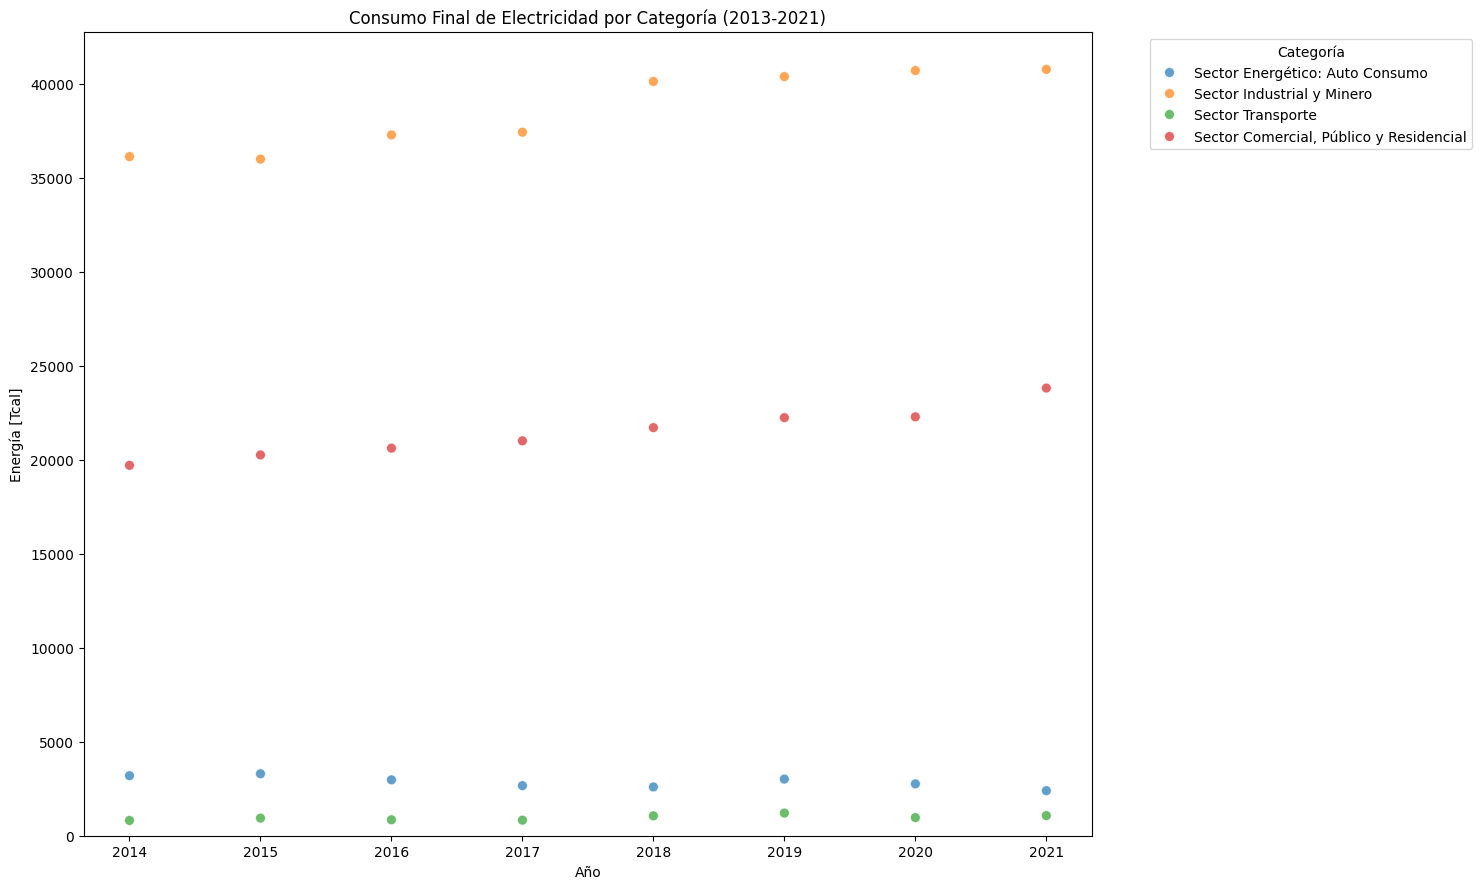

In [42]:
# Para la Energía [Tcal], se revisará de manera visual en un gráfico


# Se filtra solo los años 2013-2021
#df_2013_2021 = df_tcal_corr[(df_tcal_corr["anio"] >= 2013) & (df_tcal_corr["anio"] <= 2021)]

# Se crea el gráfico
plt.figure(figsize=(15, 9)) #dimensiones
sns.scatterplot(
    data=df_final,
    x="Año",
    y="Energía",
    hue="categoria",  # colorea por categoría
    palette="tab10",  # paleta de colores
    s=50,             # tamaño de los puntos
    alpha=0.7         # transparencia para ver mejor los solapamientos
)

# Se marca explícitamente la línea horizontal del eje de las abscisas
#plt.axhline(y=0, color="gray", linestyle="-", linewidth=1)


plt.ylim(bottom=0)

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Energía [Tcal]")
plt.title("Consumo Final de Electricidad por Categoría (2013-2021)")

# Ajustar leyenda y mostrar
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajusta todo para que no se corte
plt.show()


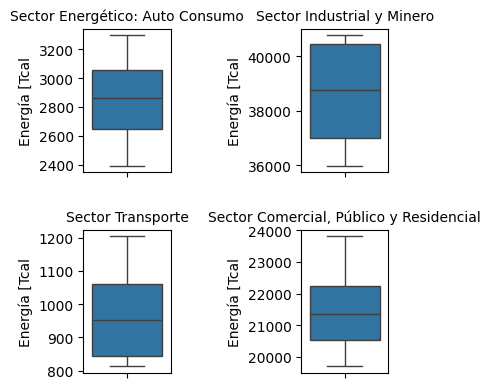

In [49]:
# Se observa en general un crecimiento paulatino en todos los sectores de consumo.
# Para tener una visión precisa de los Outliers, se costruyen BoxPlots

# Obtener las categorías únicas
categorias = df_final["categoria"].unique()
n = len(categorias)

# Definir filas y columnas de la matriz (ajusta según n)
ncols = 2
nrows = (n + ncols - 1) // ncols  # redondea hacia arriba

# Crear figura con subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))  # 2x2 pulgadas por gráfico
axes = axes.flatten()  # facilita iterar aunque haya una sola fila

# Crear un boxplot por categoría
for i, cat in enumerate(categorias):
    sns.boxplot(
        data=df_final[df_final["categoria"] == cat],
        y="Energía",
        ax=axes[i]
    )
    axes[i].set_title(cat, fontsize=10)
    axes[i].set_ylabel("Energía [Tcal")

# Si hay subplots sobrantes, los ocultamos
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=1.5, hspace=0.4)  # controla espacio horizontal y vertical

plt.show()



## Outliers en Consumo de electricidad en sectores: "Carbón y Leña", "Siderurgia Hornos Coque", "Siderurgia Altos Hornos", "Aéreo"



In [ ]:
categorias_seleccionadas = [
    "Carbón y Leña",
    "Siderurgia Hornos de Coque",
    "Siderurgia Altos Hornos",
    "Aéreo"
]

# Filtrar solo esas categorías
df_plot = df_tcal_corr[df_tcal_corr["categoria"].isin(categorias_seleccionadas)]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    hue="categoria",       # cada categoría tendrá un color distinto
    palette="tab10",
    s=50,
    alpha=0.7
)

anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title("Consumo por Categoría (2013-2021)")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Análisis de la gráfica:** Se buscó información relativa a estos consumos, pero no fue posible determinar la razón de los incrementos entre 2011 y 2015. Al ser la mayoría de los valores cercanos al cero, se presume que la inconsistencia podría deberse a ajustes o errores de estimación entre un año a otro. Al no poder ser explicados se eliminarán del análisis.

## Outliers en Consumo de electricidad en sector "Refinería Petróleo y Gas Natural"

In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Refinería Petróleo - Gas Natural"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title("Consumo de Refinería Petróleo y Gas Natural")
plt.tight_layout()
plt.show()


**Análisis de la gráfica:** Las variaciones observadas están dentro de los rangos esperados, por lo que se mantendrán estos datos para el análisis.

## Outliers en Consumo de electricidad en sector "Salitre"

In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Salitre"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title(f"Consumo de sector Salitre")
plt.tight_layout()
plt.show()

**Análisis de la gráfica:** Igualmente, las variaciones observadas están dentro de los rangos esperados, por lo que se mantendrán estos datos para el análisis.

## Outliers en Consumo de electricidad en sector "Papel y Celulosa"





In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Papel y Celulosa"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title(f"Consumo de sector Papel y Celulosa")
plt.tight_layout()
plt.show()

**Análisis de la gráfica:** Igualmente, las variaciones observadas están dentro de los rangos esperados, por lo que se mantendrán estos datos para el análisis.

## Outliers en Consumo de electricidad en sector "Petroquímica"

In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Petroquímica"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title(f"Consumo de sector Petroquímica")
plt.tight_layout()
plt.show()

In [ ]:
#TEMPORAL
display(df_tcal_corr[df_tcal_corr["categoria"] == "Petroquímica"]["tcal"].values)

**Análisis de la gráfica:** La industria petroquímica ha tenido una tendencia sostenida y consistente a la baja. Se mantienen los valores.

## Outliers en Consumo de electricidad en sector "Azúcar"

In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Azúcar"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title(f"Consumo de sector Azúcar")
plt.tight_layout()
plt.show()

**Análisis de la gráfica:** Las variaciones observadas están dentro de variaciones razonables de un año a otro, por lo que se mantendrán estos datos para el análisis.

## Outliers en Consumo de electricidad en sector "Transporte"

In [ ]:
df_plot = df_tcal_corr[df_tcal_corr["categoria"]
                       == "Sector Transporte"]

plt.figure(figsize=(15, 6))

sns.scatterplot(
    data=df_plot,
    x="anio",
    y="tcal",
    color="tab:blue",   # un solo color
    s=50,
    alpha=0.7
)
anios = sorted(df_plot["anio"].unique())   # lista de años presentes en tus datos
plt.xticks(anios)

plt.xlabel("Año")
plt.ylabel("Tcal")
plt.title(f"Consumo de sector Transporte")
plt.tight_layout()
plt.show()

**Análisis de la gráfica:** Las variaciones observadas en 2014 se deben, por una parte, a la modificación de la definición de algunos consumos eléctricos que hicieron aunmentar este número y reducirlo en el sector Industrial/Comercial. El valor total, sin embargo, seguirá siendo consistente. Por otra parte, la electromovilidad ha tenido un incremento posterior importante, debido a la extensión de las redes del Metro de Santiago (ciudad capital), y la incorporación de buses eléctricos.

Nota: No se incluirá el análisis desagregado de los distintos modos de transporte: Terrestre, Ferroviario, Marítimo, Aéreo, pues están considerados en la gráfica recién descrita.